<img src='logo.png'><br>
* ref : <a href='https://www.kaggle.com/mlg-ulb/creditcardfraud'>https://www.kaggle.com/mlg-ulb/creditcardfraud</a>

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score
from sklearn.preprocessing import Binarizer

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler 
import warnings
warnings.filterwarnings(action='ignore')

sns.set()



In [5]:
def my_eval(y_val, pred, proba, th):  #avg='binary'
        accuracy = accuracy_score(y_val, pred)
        precision = precision_score(y_val, pred)
        recall = recall_score(y_val, pred)
        f1 = f1_score(y_val, pred)
        matrix = confusion_matrix(y_val, pred)
        print(f'정확도{accuracy:.4f} 정밀도:{precision:.4f} 재현률:{recall:.4f} f1:{f1:.4f}')
        print("오차행렬\n", matrix)
        # cls_report = classification_report(y_val, pred)

        # --------------- 양성 평가를 위한 차트 : precision_recall_curv() -------------------    
        # plot_precision_recall_curve(model, 문제지2, 정답지2)
        precisions, recalls, ths = precision_recall_curve(y_val, proba[:, 1])
        plt.title("precision recall curv %0.2f %0.4f"%(th,f1))
        # plt.title(f"precision recall curv %0.4f" % f1)
        plt.xlabel("threadhold")
        plt.ylabel("value")
        plt.plot(ths, precisions[:ths.shape[0]], "b", label="precision")
        plt.plot(ths, recalls[:ths.shape[0]], "r", linestyle='--', label="recall")
        plt.grid()
        plt.legend()
        plt.show()
        
        
        # --------------- 양성 평가를 위한 차트 : roc_auc_score(), roc_curve() -------------------
        auc_score = roc_auc_score(y_val, proba[:, 1])

        fprs, tprs, ths = roc_curve(y_val, proba[:, 1])
        plt.title("roc curv %0.4f" % auc_score)
        # plt.title(f"precision recall curv %0.4f" % f1)
        plt.xlabel("FPR(1-specificity)")
        plt.ylabel("TPR")
        plt.grid()
        plt.plot(fprs, tprs, "b")
        plt.plot([0, 1], [0, 1], '--', color='black')
        plt.show()


def split_fit_score(X, y, model=None, test_size=0.2, th_list=None):

        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=test_size,
                                                            random_state=1414,
                                                            stratify=y) #shuffle=False, 

        model.fit(X_train, y_train)
        pred = model.predict(X_test)                                        #[0  1]              th:0.5
        proba = model.predict_proba(X_test)                                 #[[.7 >.3] [.4  <.6]]  --> [0  1]
        
        # ------------------ proba : 양성 점수 측정을 위한 예측 확률값 ---------------
        # proba 리턴값 : ndarray of shape (n_samples, n_classes)  150*3
        # [
        #     [0.4 0.6]  --> 1
        #     [0.7 0.3]  --> 0
        #     [0.42 0.58] -> 1
        # ]
        
        if th_list == None:
            #------------------방법1 ) 임계치 0.5(기본값)으로 점수 출력 ---------------
            binz = Binarizer(threshold=0.5)                              # th:0.5
            pred_binz = binz.fit_transform(proba[:, 1].reshape(-1,1))    # [[.7 >.3] [.4  <.6]]  --> [0  1]
            my_eval(y_test, pred_binz, proba, 0.5)                        # 점수def호출
 
        else:
            # ----------------방법2) 임계치 조정해가면서 최적의 점수 찾기---------------
            # (24 양성인데 틀리게예측) --> 임계치 낮춘다 == 양성학습데이터늘린다  == 양성점수를 올린다 
            th_list = [0, 0.35 , 0.38, 0.42, 0.45, 0.5, 1]
            for th in th_list:
                    binz = Binarizer(threshold=th)                              # [[.7 .3] [.4  .6]]   th:0.2
                    pred_binz = binz.fit_transform(proba[:, 1].reshape(-1,1))   # [  th<.3] [  th<.6]]  --> [1 1]
                    print(th)
                    my_eval(y_test, pred_binz, proba, th)                       #점수def호출

In [6]:
df = pd.read_csv('./kaggle/credit_card_fraud/creditcard_sample.csv')
df.drop('Time', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      56962 non-null  float64
 1   V2      56962 non-null  float64
 2   V3      56962 non-null  float64
 3   V4      56962 non-null  float64
 4   V5      56962 non-null  float64
 5   V6      56962 non-null  float64
 6   V7      56962 non-null  float64
 7   V8      56962 non-null  float64
 8   V9      56962 non-null  float64
 9   V10     56962 non-null  float64
 10  V11     56962 non-null  float64
 11  V12     56962 non-null  float64
 12  V13     56962 non-null  float64
 13  V14     56962 non-null  float64
 14  V15     56962 non-null  float64
 15  V16     56962 non-null  float64
 16  V17     56962 non-null  float64
 17  V18     56962 non-null  float64
 18  V19     56962 non-null  float64
 19  V20     56962 non-null  float64
 20  V21     56962 non-null  float64
 21  V22     56962 non-null  float64
 22

In [8]:
df.shape

(56962, 30)

In [9]:
y = df['Class']
X = df.drop(['Class'], axis=1)



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1414)


In [11]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
for sc in scalers:
    sc.fit(X_train['Amount'].values.reshape(-1,1))
    train_sc_arr = sc.transform(X_train['Amount'].values.reshape(-1,1))   #[2 2 2 2 2 2 2 2 2 2 2...]
    test_sc_arr = sc.transform(X_test['Amount'].values.reshape(-1,1))
    X_train['Amount_'+ sc.__class__.__name__[:3]] = train_sc_arr #.reshape(-1,1)
    X_test ['Amount_'+ sc.__class__.__name__[:3]] = test_sc_arr #.reshape(-1,1)    

# Amount_Sta

In [12]:
X_train_sta = X_train.drop(columns=["Amount","Amount_Min","Amount_Rob"], axis=1)
X_test_sta = X_test.drop(columns=["Amount","Amount_Min","Amount_Rob"], axis=1)

In [13]:
X_train_sta.shape, X_test_sta.shape

((45569, 29), (11393, 29))

In [14]:
dd = y_train.append(y_test)
dd.value_counts()

0    56863
1       99
Name: Class, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

model = RandomForestClassifier()
# model = DecisionTreeClassifier()
# model = LogisticRegression()

accuracy 0.9991222680593347
f1 0.7222222222222223
정확도0.9991 정밀도:0.8125 재현률:0.6500 f1:0.7222
오차행렬
 [[11370     3]
 [    7    13]]


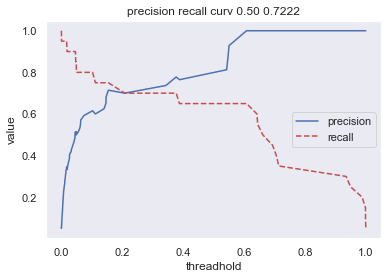

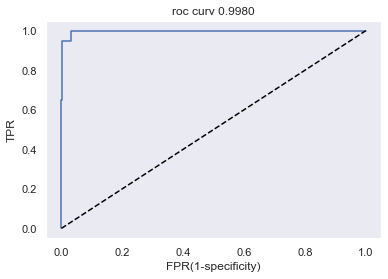

In [16]:

model.fit(X_train_sta, y_train)
pred = model.predict(X_test_sta)
proba = model.predict_proba(X_test_sta)

accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("accuracy", accuracy)
print("f1", f1)   

th=0.5
my_eval(y_test, pred, proba, th)
# accuracy 0.9995611340296673
# f1 0.8571428571428571

# Amount_Min

In [17]:
X_train_Min = X_train.drop(columns=["Amount","Amount_Sta","Amount_Rob"], axis=1)
X_test_Min = X_test.drop(columns=["Amount","Amount_Sta","Amount_Rob"], axis=1)

accuracy 0.9991222680593347
f1 0.7222222222222223
정확도0.9991 정밀도:0.8125 재현률:0.6500 f1:0.7222
오차행렬
 [[11370     3]
 [    7    13]]


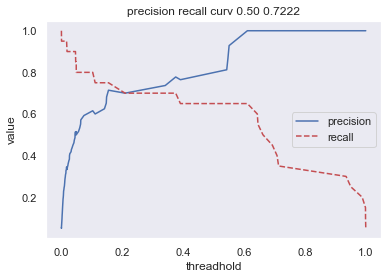

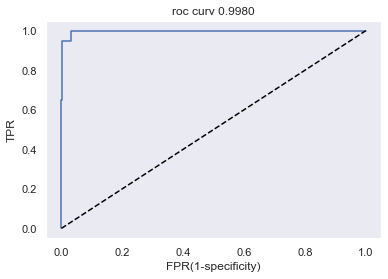

In [18]:

model.fit(X_train_Min, y_train)
pred = model.predict(X_test_Min)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
proba = model.predict_proba(X_test_Min)
print("accuracy", accuracy)
print("f1", f1)   
th=0.5
my_eval(y_test, pred, proba, th)

# accuracy 0.9995611340296673
# f1 0.8571428571428571

# Amount_Rob

In [19]:
X_train_Rob = X_train.drop(columns=["Amount","Amount_Sta","Amount_Min"], axis=1)
X_test_Rob = X_test.drop(columns=["Amount","Amount_Sta","Amount_Min"], axis=1)

accuracy 0.9991222680593347
f1 0.7222222222222223
정확도0.9991 정밀도:0.8125 재현률:0.6500 f1:0.7222
오차행렬
 [[11370     3]
 [    7    13]]


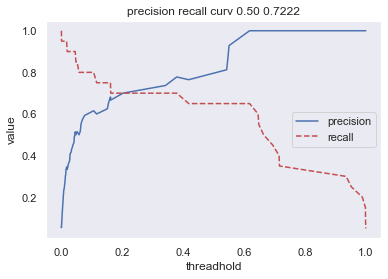

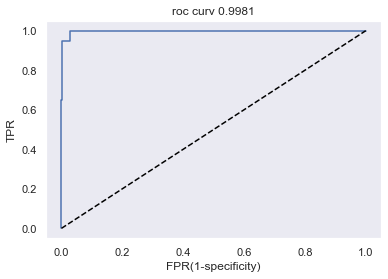

In [20]:

model.fit(X_train_Rob, y_train)
pred = model.predict(X_test_Rob)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
proba = model.predict_proba(X_test_Rob)
print("accuracy", accuracy)
print("f1", f1)   
th=0.5
my_eval(y_test, pred, proba, th)

# accuracy 0.9996489072237339
# f1 0.888888888888889

### (+) 'V11', 'V4',

### (-) 'V17', 'V14', 'V12'

## 모델 선정 & 학습 & 평가